## PCA on a real-world Dataset

we will be working with a subset of MNIST dataset. The cell below generates the data-matrix X which is of shape(d,n) 
where n denotes the number of samples and d denotes the number of features

In [3]:
!pip install keras
!pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X = X_train[y_train==2][:100].reshape(-1, 28*28).T
test_image = X_test[y_test == 2][0].reshape(28*28)


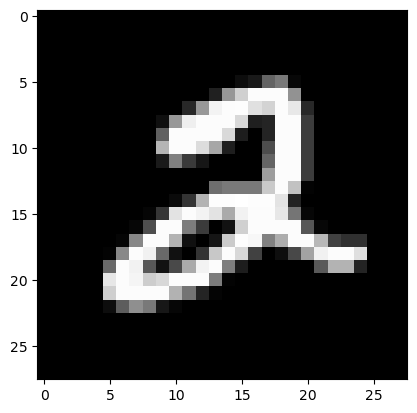

In [9]:
# Obseving the first image of the dataset
import matplotlib.pyplot as plt
img = X[:,0].reshape(28, 28)
plt.imshow(img, cmap='gray');